C:\Users\hrush\AppData\Local\Temp\ipykernel_18812\604808343.py:18: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\hrush\AppData\Local\Temp\ipykernel_18812\604808343.py:22: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



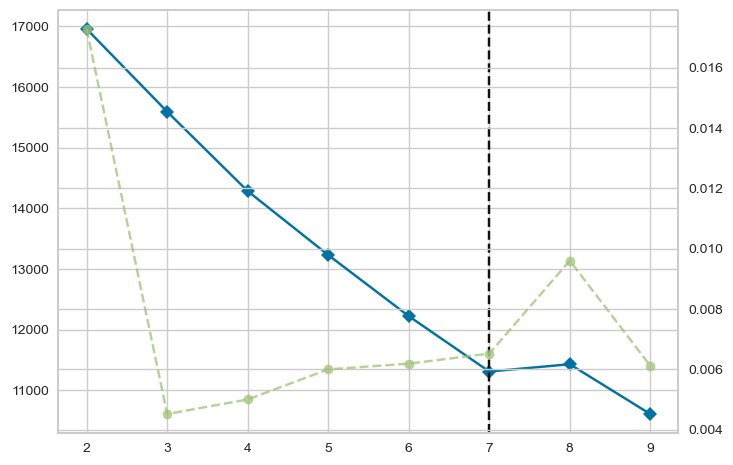

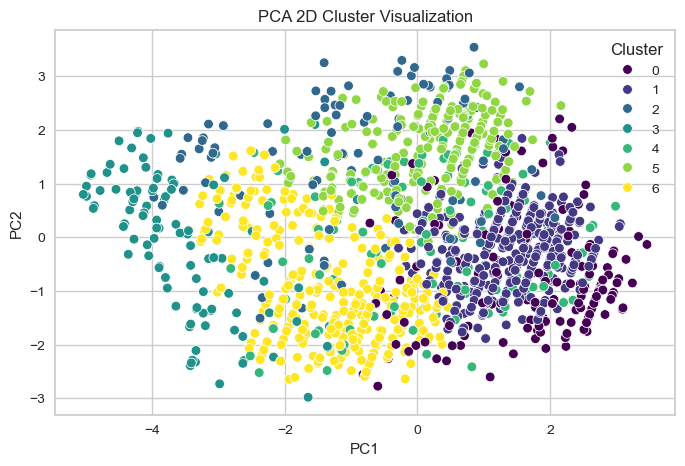

Silhouette Score: 0.17893135818589306


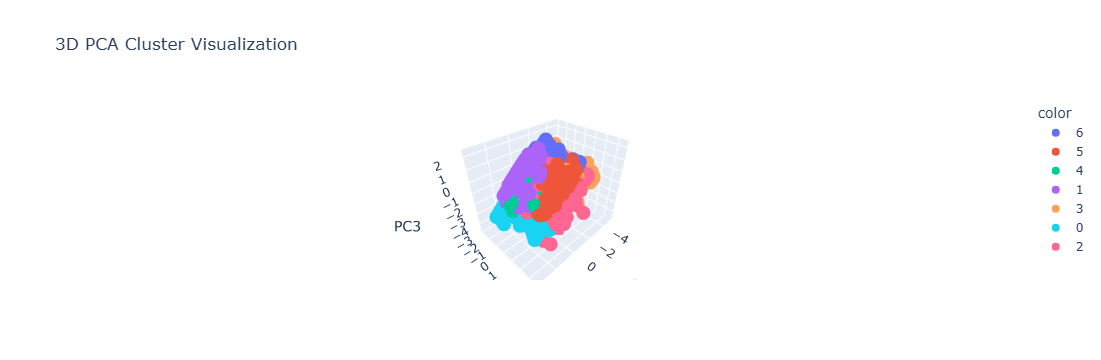

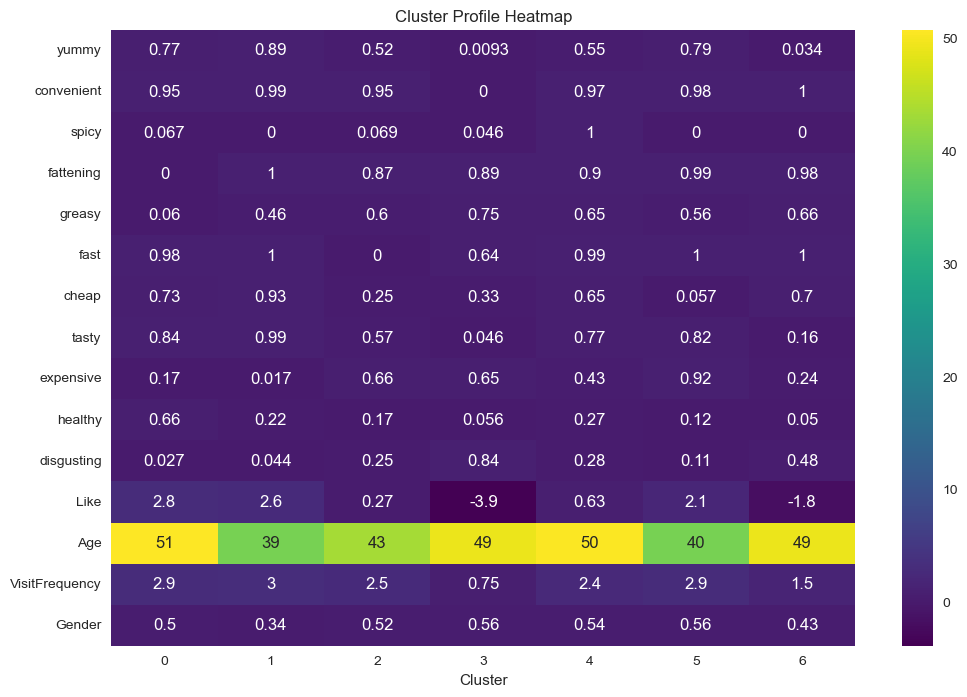

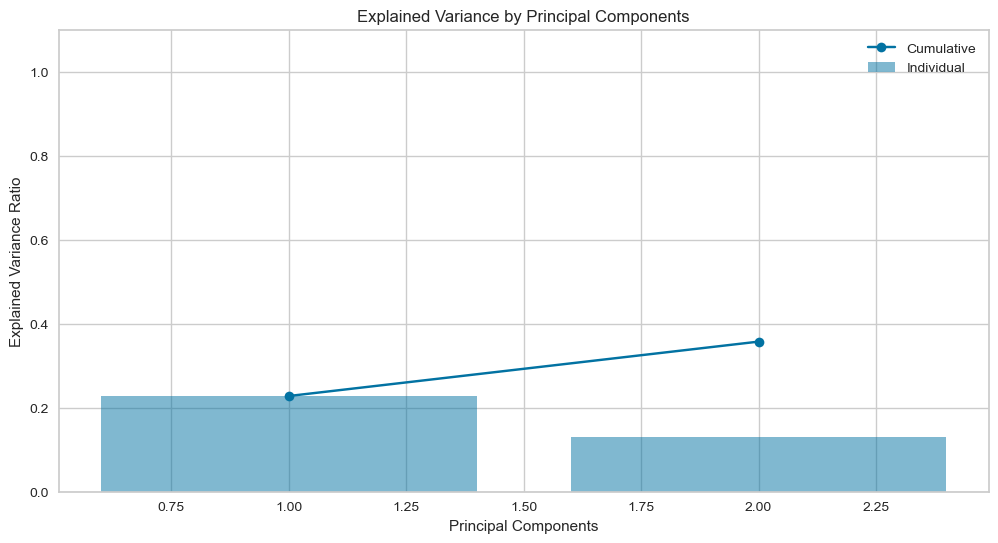

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

# Load Dataset
df = pd.read_csv("C:/Users/hrush/Downloads/mcdonalds.csv", encoding='latin1') 


# Convert Yes/No Responses to Binary
binary_cols = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0})

# Encode 'Like' Ratings
like_map = {'I hate it!-5': -5, '-4': -4, '-3': -3, '-2': -2, '-1': -1, '0': 0, '+1': 1, '+2': 2, '+3': 3, '+4': 4, 'I love it!+5': 5}
df['Like'] = df['Like'].replace(like_map).astype(int)

# Encode 'VisitFrequency' and 'Gender'
df['VisitFrequency'] = OrdinalEncoder(categories=[['Never', 'Once a year', 'Every three months', 'Once a month', 'Once a week', 'More than once a week']]).fit_transform(df[['VisitFrequency']])
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

# Feature Scaling
X = df.drop(columns=['Like'])
X_scaled = StandardScaler().fit_transform(X)

# Find Optimal Clusters
elbow = KElbowVisualizer(KMeans(random_state=42), k=(2, 10))
elbow.fit(X_scaled)
optimal_k = elbow.elbow_value_

# KMeans Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# PCA for Visualization
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(X_scaled)

# PCA Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('PCA 2D Cluster Visualization')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Silhouette Score
print("Silhouette Score:", silhouette_score(X_scaled, df['Cluster']))

# 3D PCA Visualization
pca_3d = PCA(n_components=3).fit_transform(X_scaled)
pca_df = pd.DataFrame(pca_3d, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster'] = df['Cluster']
fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color=pca_df['Cluster'].astype(str), title='3D PCA Cluster Visualization')
fig.show()

# Additional Analysis: Cluster Profile
cluster_profile = df.groupby('Cluster').mean().T
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_profile, annot=True, cmap='viridis')
plt.title('Cluster Profile Heatmap')
plt.show()

# Scree Plot for PCA Explained Variance
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), 
         np.cumsum(pca.explained_variance_ratio_), 'bo-', label='Cumulative')
plt.bar(range(1, len(pca.explained_variance_ratio_)+1),
        pca.explained_variance_ratio_, 
        alpha=0.5, label='Individual')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.ylim(0, 1.1)
plt.show()
